In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '..')

from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.support.support.df import simulate_df
from match.support.support.series import simulate_series

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
n_rows = 10
n_columns = 100

In [3]:
target = simulate_series(n_columns, name='Target Name', index_prefix='Sample ')

In [4]:
features_continuous = simulate_df(
    n_rows, n_columns, index_prefix='Feature ', column_prefix='Sample ')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (2 process) ...
Computing MoEs with 5 samplings ...
Computing p-values and FDRs with 5 permutations ...
Computing p-values and FDRs with 5 permutations ...
	1/5 ...
	1/5 ...
	5/5 - done.
	5/5 - done.


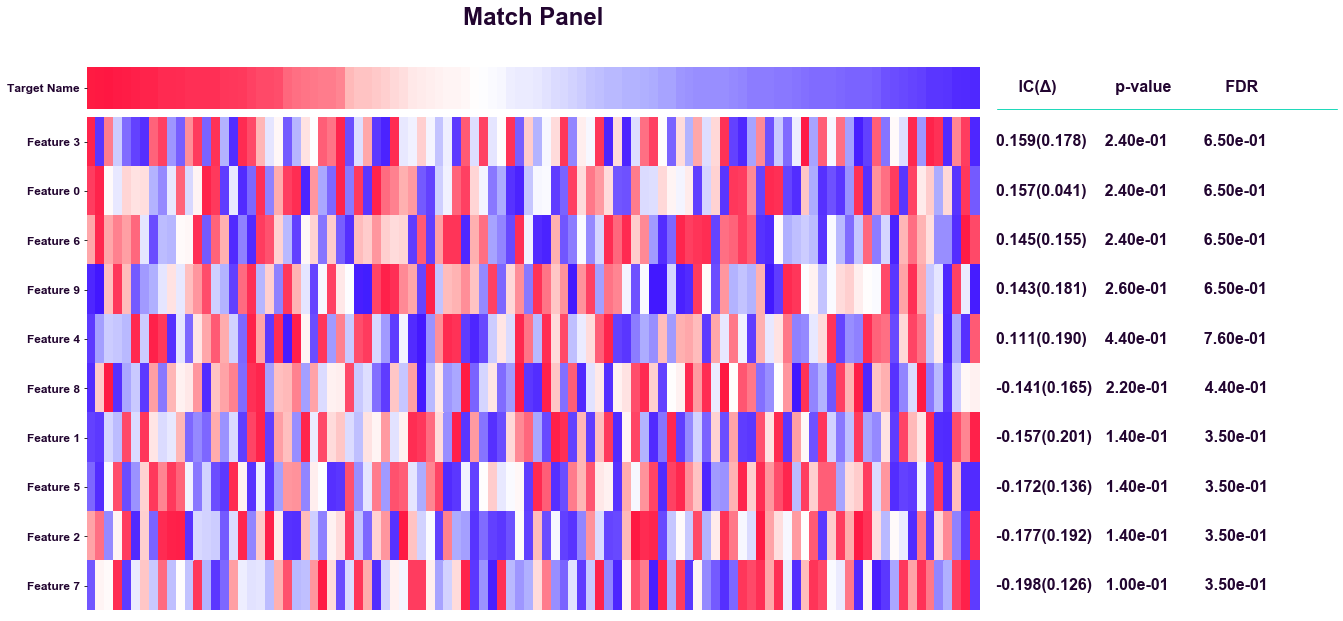

In [5]:
match_scores_for_continuous = make_match_panel(
    target,
    features_continuous,
    n_jobs=2,
    n_samplings=5,
    n_permutations=5,
    plot_sample_names=True)

In [6]:
target_str = pd.Series(
    ['T0'] * (n_columns // 2) + ['T1'] * (n_columns // 2), index=target.index)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (2 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
	3/3 - done.


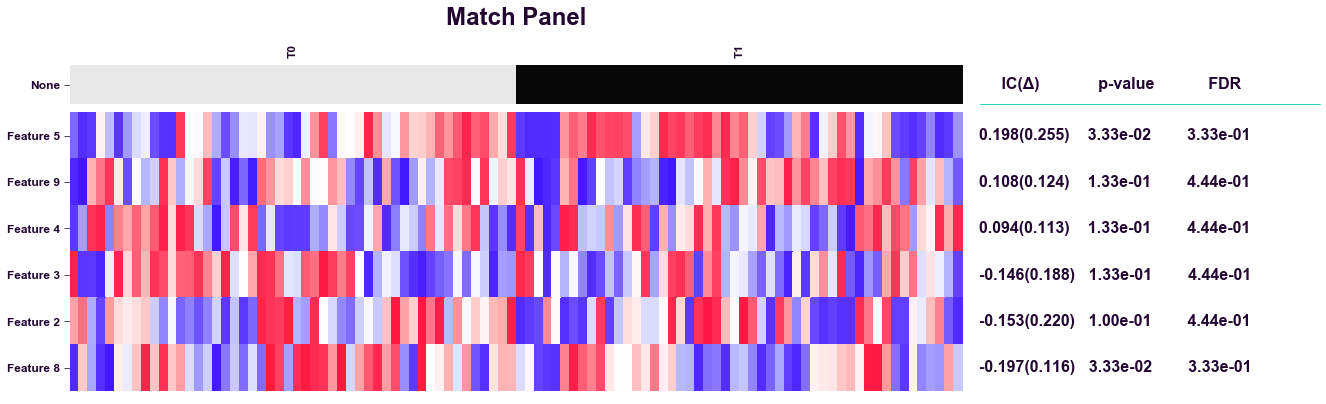

In [7]:
match_scores_for_continuous = make_match_panel(
    target_str,
    features_continuous,
    n_jobs=2,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    target_type='binary',
    plot_sample_names=True)

In [8]:
features_categorical = simulate_df(
    n_rows, n_columns, 8, index_prefix='Feature ', column_prefix='Sample ')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (2 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
	3/3 - done.


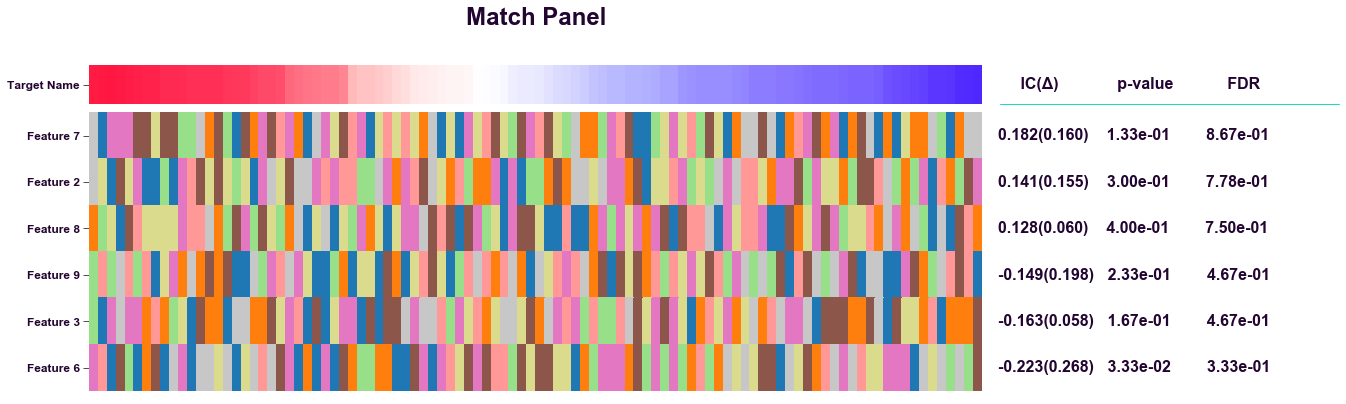

In [9]:
match_scores_for_categorical = make_match_panel(
    target,
    features_categorical,
    n_jobs=2,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='categorical',
    plot_sample_names=True)

In [10]:
features_binary = simulate_df(
    n_rows, n_columns, 2, index_prefix='Feature ', column_prefix='Sample ')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (2 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
	3/3 - done.


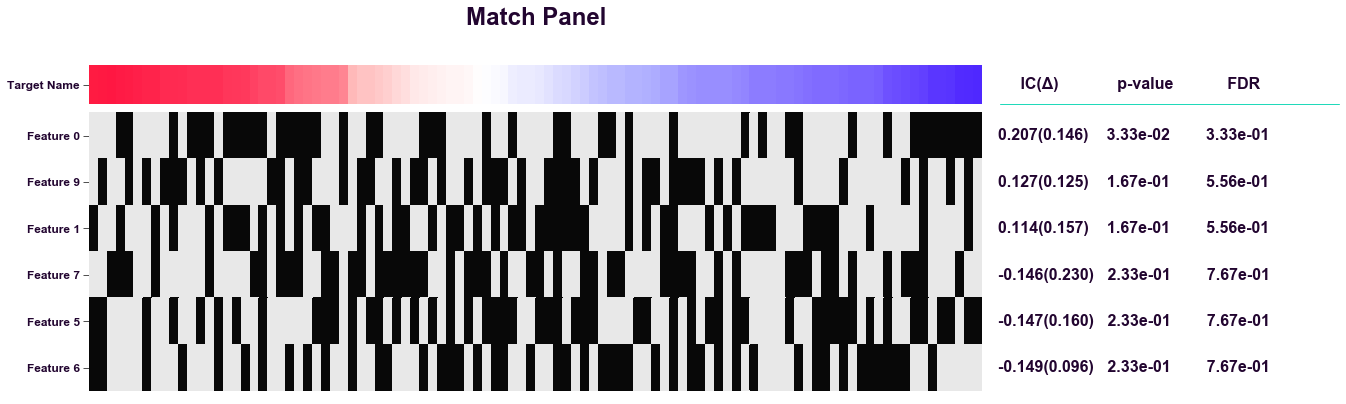

In [11]:
match_scores_for_binary = make_match_panel(
    target,
    features_binary,
    n_jobs=2,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [12]:
features_with_missing = simulate_df(
    n_rows, n_columns, index_prefix='Feature ', column_prefix='Sample ')

features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n_columns // 3),
    np.random.choice(features_with_missing.columns, size=n_columns //
                     3)] = None

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (2 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
	3/3 - done.


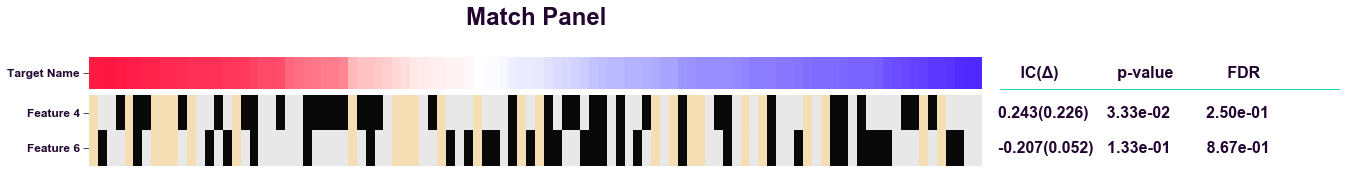

In [13]:
match_scores_for_binary = make_match_panel(
    target,
    features_with_missing,
    n_jobs=2,
    n_features=0.95,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [14]:
multiple_features = {
    'Continuous features': {
        'df': features_continuous,
        'indices': ['Feature {}'.format(i) for i in range(n_rows)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n_rows)],
        'emphasis': 'high',
        'data_type': 'continuous'
    },
    'Categorical features': {
        'df': features_categorical,
        'indices': ['Feature {}'.format(i) for i in range(n_rows)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n_rows)],
        'emphasis': 'high',
        'data_type': 'categorical'
    },
    'Binary features': {
        'df': features_binary,
        'indices': ['Feature {}'.format(i) for i in range(n_rows)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n_rows)],
        'emphasis': 'high',
        'data_type': 'binary'
    },
    'Cotinuous features (scores ascending)': {
        'df': features_continuous.iloc[:, :-1],
        'indices': ['Feature {}'.format(i) for i in range(n_rows)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n_rows)],
        'emphasis': 'low',
        'data_type': 'continuous'
    }
}

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Cotinuous features (scores ascending) ...
Dropping 0 axis-1 slices ...
Computing match score with <funct

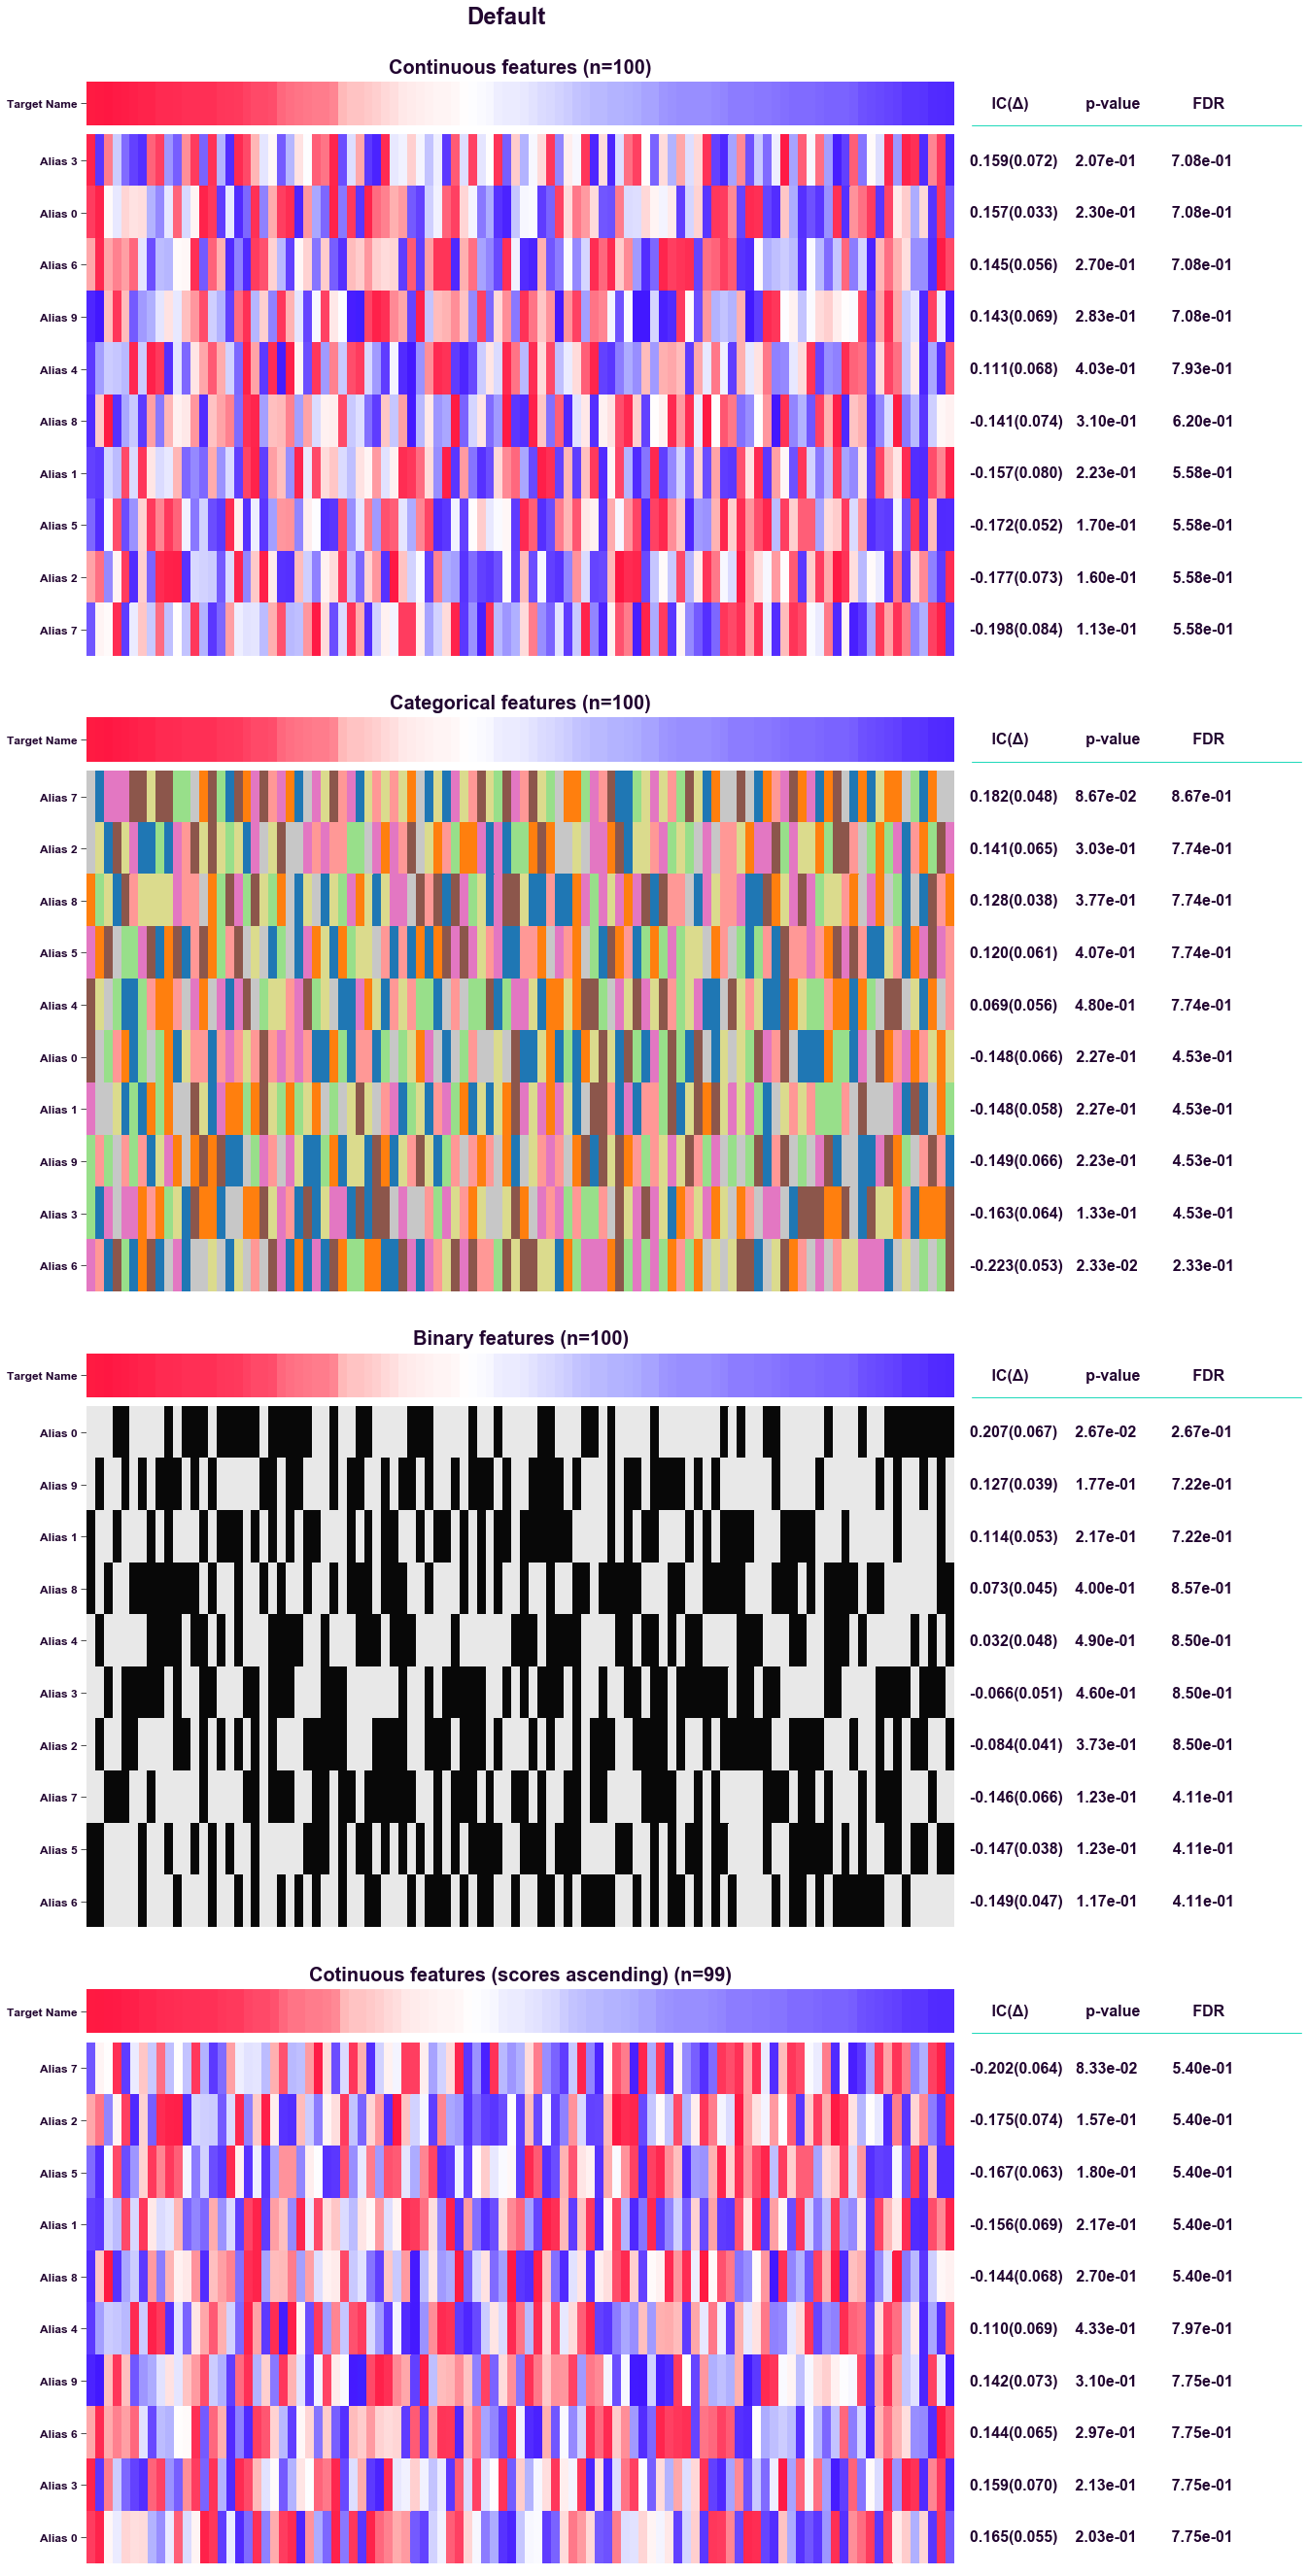

In [15]:
make_summary_match_panel(
    target, multiple_features, title='Default', plot_sample_names=True)

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e37d950> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Cotinuous features (scores ascending) ...
Dropping 0 axis-1 slices ...
Computing match score with <funct

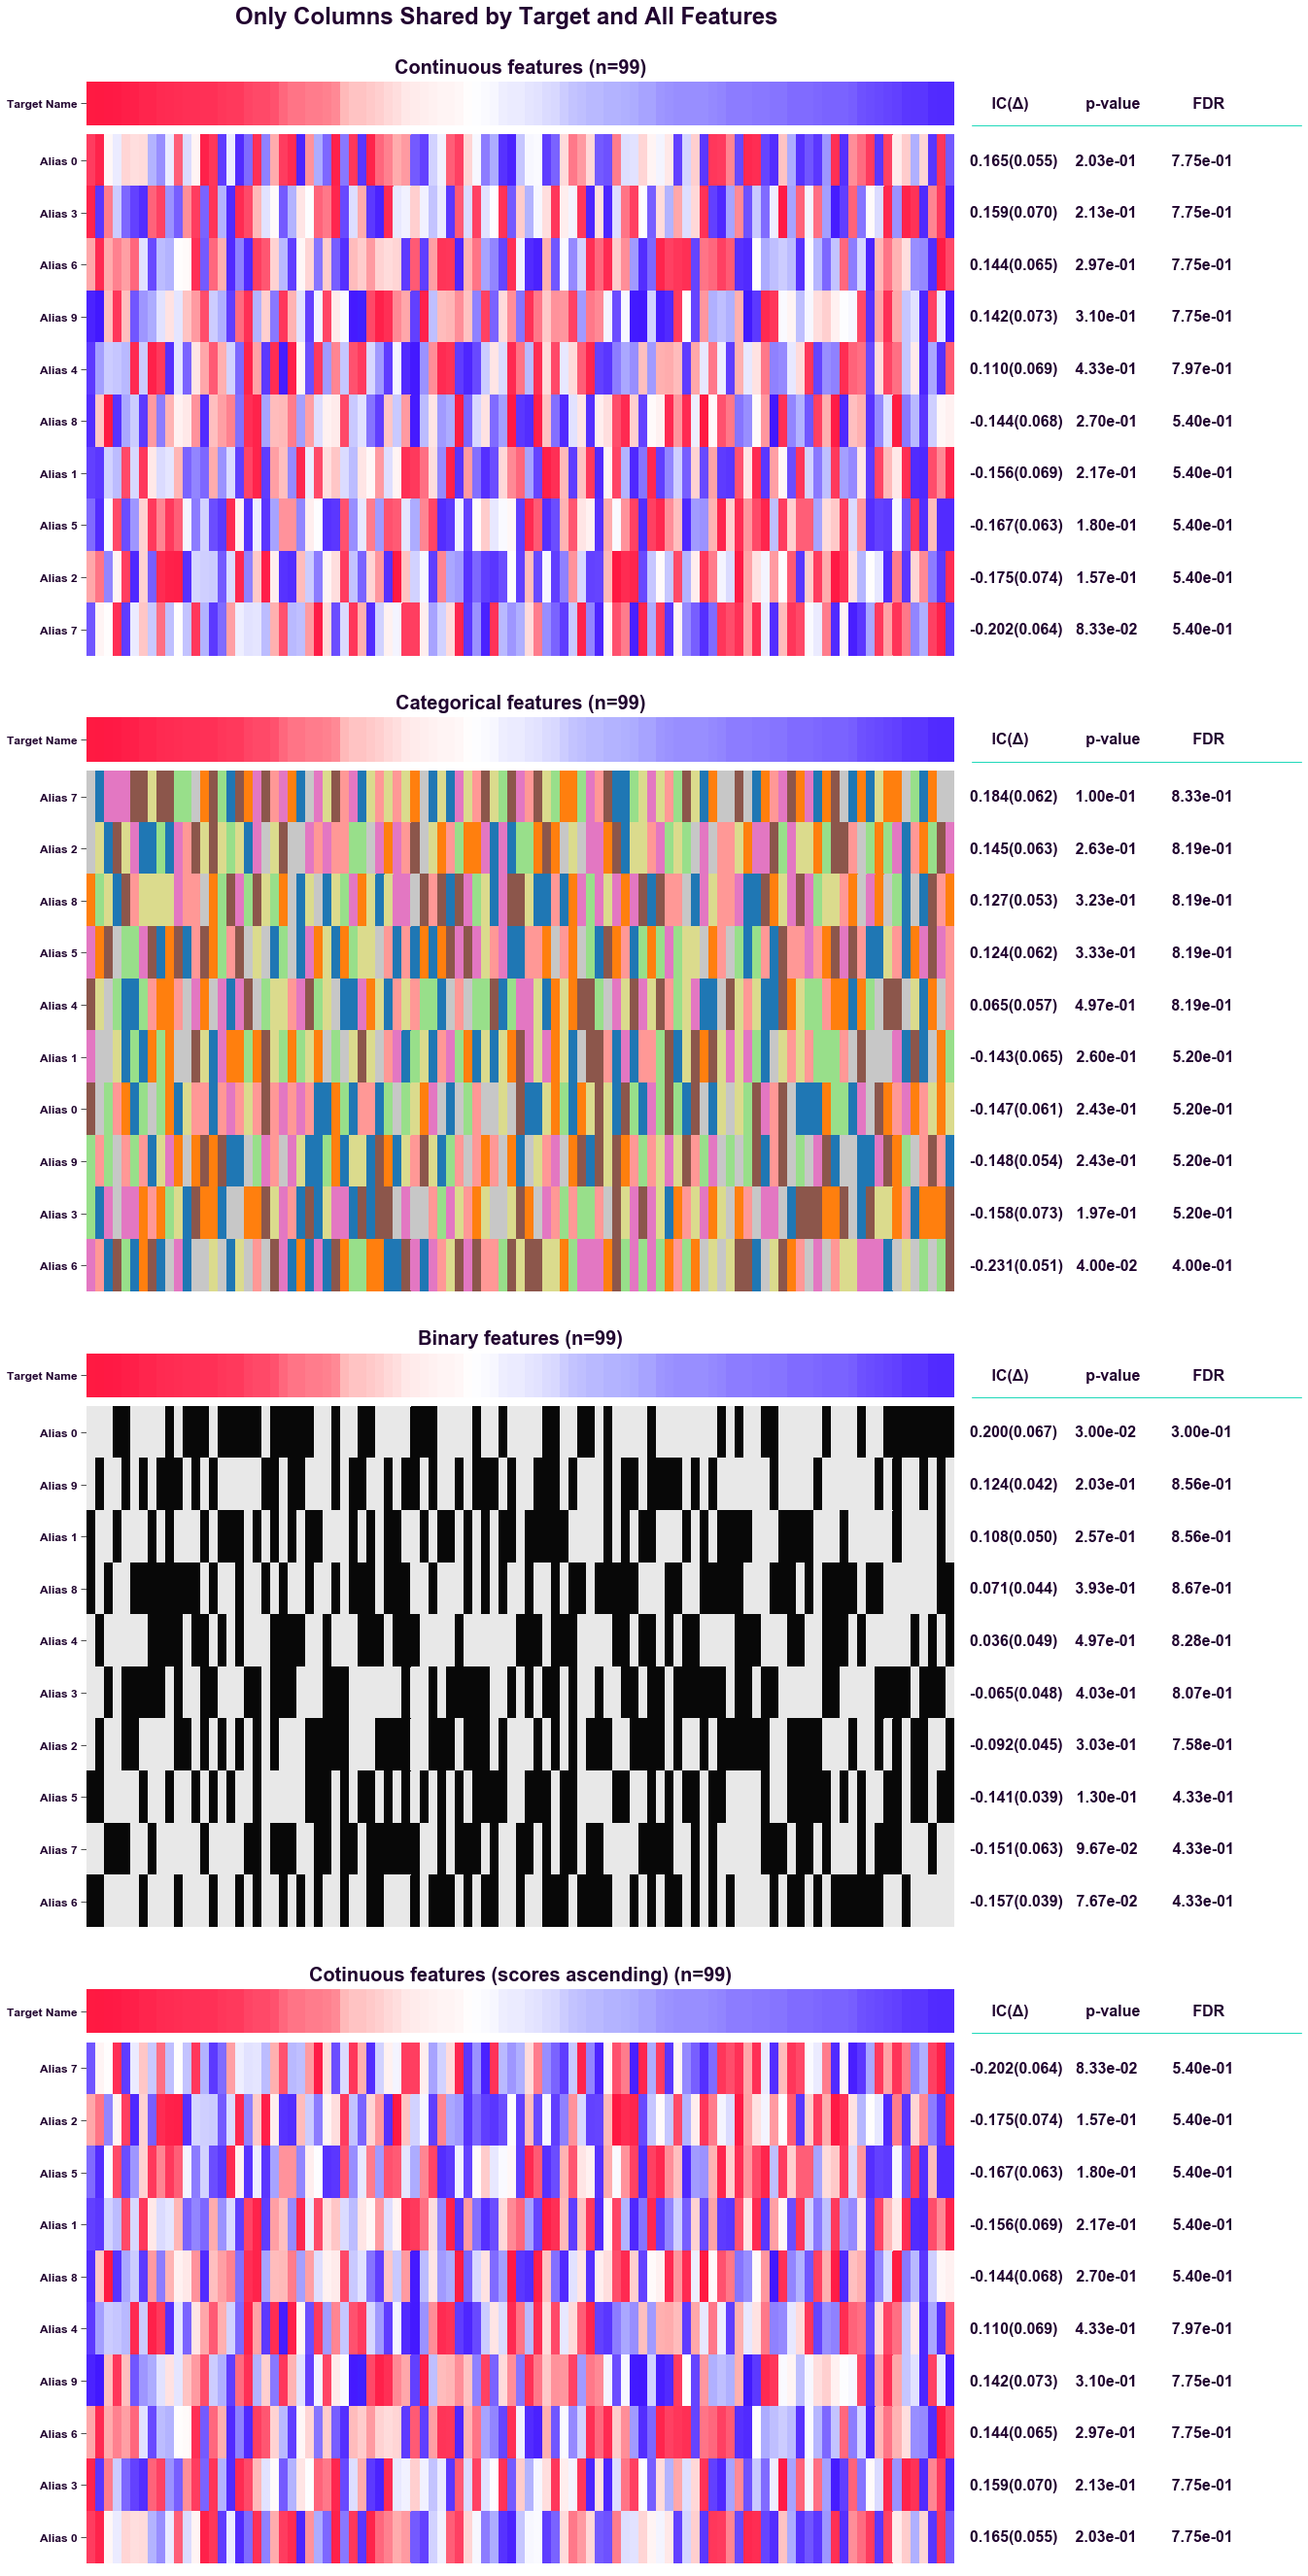

In [16]:
make_summary_match_panel(
    target,
    multiple_features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only Columns Shared by Target and All Features',
    plot_sample_names=True)